# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [ ]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.2.2'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [ ]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [ ]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [ ]:
print(f'Количество колонок: {df.shape[1]}\nКоличество строк: {df.shape[0]}')

Количество колонок: 15
Количество строк: 32561


3) Какие типы данных у элементов этого датасета?

In [ ]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education.num,int64
marital.status,object
occupation,object
relationship,object
race,object
sex,object


4) Какие признаки имеют пропуски?

In [ ]:
print("Признаки с пропусками:")
print(df.isna().sum()[df.isna().sum() > 0])

Признаки с пропусками:
workclass         1836
occupation        1843
native.country     583
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ошибки могут позникать по многим причинам:

Сбор:
- Не были предусмотрены все пограничные условия. К примеру, при сборе данных о погоде не было предусмотрено хранение отрицательных значений температур. Или в случае с записью общего состояния за окном (ясно, облачно) не был предусмотрен вариант "туман".
- Изменились условия в процессе получения данных. Особенно в случае, если данные собираются в течение длительного промежутка времени. К примеру, в веб-сайте, с которого производится парсинг данных, незначительно поменялась разметка. Недостаточно сильно, чтобы парсер перестал работать, но достаточно для того, чтобы в собираемых данных начали встречаться ошибки;
- Аппаратно/программные ошибки в процессе сбора данныхю. Ошибки записи данных на постоянное хранилище. К примеру: в программе не было предусмотрено возникновение неполадок на железном уровне. В таком случае может произойти много чего:
  - Программа не сможет вернуть прежнее состояние;
  - Могут потеряться (или записаться с искажением) данные, запись которых производилась непосредственно в момент отключения компьютераж
  - Проблемы сетевого характера (банально может отключиться интернет)

Обработка:
- Был выбран неподходящий тип данных для хранения значений. К примеру, не были предусмотрены все enum значения для описания поля. Или для записи чисел с плавающей запятой был использован int;
- Ошибка программиста при парсинге данных (если таковой требуется) - накосячили с regex-ом, xpath-ом и т.п...

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
import numpy as np

In [ ]:
set(df['workclass'])

{' Federal-gov',
 ' Local-gov',
 ' Never-worked',
 ' Private',
 ' Self-emp-inc',
 ' Self-emp-not-inc',
 ' State-gov',
 ' Without-pay',
 nan}

7) Какой средний возраст женщин и мужчин?

In [ ]:
np.average(df['age'])

np.float64(38.58164675532078)

8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

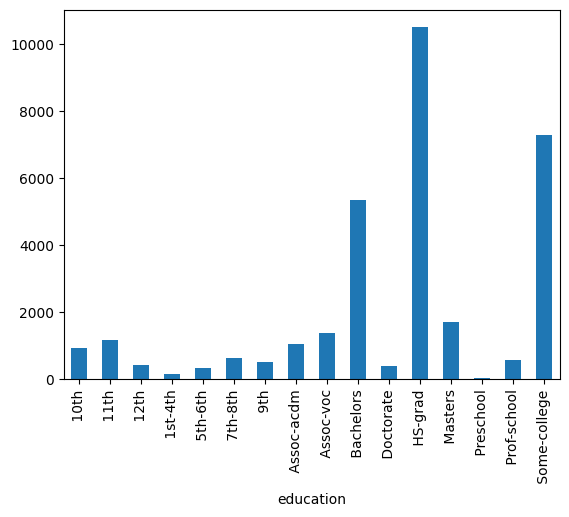

In [ ]:
df.groupby('education').count()['age'].plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [ ]:
set(df['income'])

{' <=50K', ' >50K'}

In [ ]:
ages = df[df['income'] == ' >50K']['age']

print(f'Среднее: {ages.mean()}\nСреднеквадратичные отклонения: {ages.std()}')

Среднее: 44.24984058155847
Среднеквадратичные отклонения: 10.51902771985177


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [ ]:
set(df['education'])

{' 10th',
 ' 11th',
 ' 12th',
 ' 1st-4th',
 ' 5th-6th',
 ' 7th-8th',
 ' 9th',
 ' Assoc-acdm',
 ' Assoc-voc',
 ' Bachelors',
 ' Doctorate',
 ' HS-grad',
 ' Masters',
 ' Preschool',
 ' Prof-school',
 ' Some-college'}

In [ ]:
requested_educations = [
    ' Bachelors',
    ' Prof-school',
    ' Assoc-acdm',
    ' Assoc-voc',
    ' Masters',
    ' Doctorate'
]

result = df[df['income'] == ' >50K']['education'].apply(lambda x: x not in requested_educations).any()

if result:
    print('Нет. Есть люди, у которых отсутствует одно из приведенных выше степеней образования')
else:
    print('Да. Все люди имеют одно из приведенных образований')

Нет. Есть люди, у которых отсутствует одно из приведенных выше степеней образования


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [ ]:
set(df['marital.status'])

{' Divorced',
 ' Married-AF-spouse',
 ' Married-civ-spouse',
 ' Married-spouse-absent',
 ' Never-married',
 ' Separated',
 ' Widowed'}

In [ ]:
rich_ones = df[
    (df['income'] == ' >50K') &
    (df['sex'] == ' Male')
]['marital.status'].apply(lambda x: str(x))

married_count = rich_ones[rich_ones.str.startswith(' Married')].count()
non_married_count = rich_ones.count() - married_count
rich_ones_count = rich_ones.count()

married_perc = married_count / rich_ones_count
non_married_perc = (rich_ones_count - married_count)  / rich_ones_count

if married_perc > non_married_perc:
    print(f'Женатых больше ({married_perc:.2f} > {non_married_perc:.2f})')
else:
    print(f'Холостых больше ({non_married_perc:.2f} > {married_perc:.2f})')

Женатых больше (0.90 > 0.10)


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



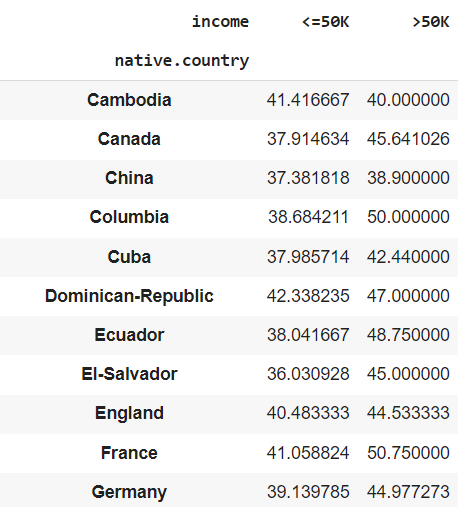

In [ ]:
pd.crosstab(index=df['native.country'], values=df['hours.per.week'], columns=df['income'], aggfunc='mean')

income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

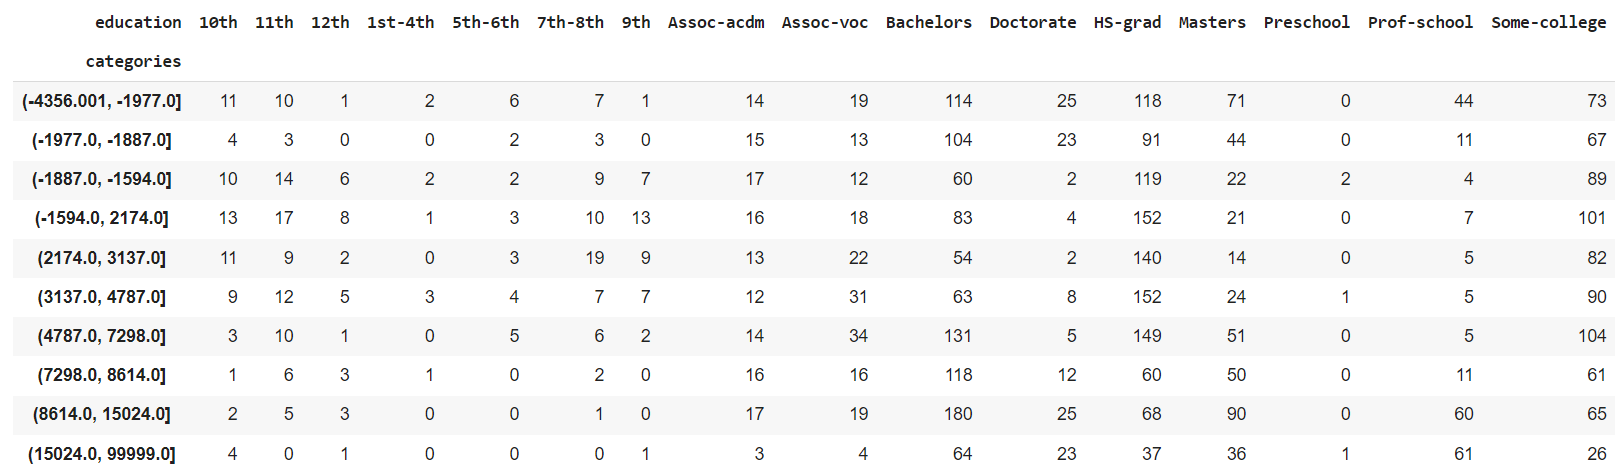

In [ ]:
st = df[['education']].copy()

st['capital.diff'] = df['capital.gain'] - df['capital.loss']
st = st[st['capital.diff'] != 0]
st['categories'] = pd.qcut(st['capital.diff'], q=10)

pd.pivot_table(
    data=st,
    index='education',
    columns='categories',
    values='capital.diff',
    aggfunc='count'
)

<ipython-input-21-f4741da83e06>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(


categories,"(-4356.001, -1977.0]","(-1977.0, -1887.0]","(-1887.0, -1594.0]","(-1594.0, 2174.0]","(2174.0, 3137.0]","(3137.0, 4787.0]","(4787.0, 7298.0]","(7298.0, 8614.0]","(8614.0, 15024.0]","(15024.0, 99999.0]"
education,,,,,,,,,,
10th,11,4,10,13,11,9,3,1,2,4
11th,10,3,14,17,9,12,10,6,5,0
12th,1,0,6,8,2,5,1,3,3,1
1st-4th,2,0,2,1,0,3,0,1,0,0
5th-6th,6,2,2,3,3,4,5,0,0,0
7th-8th,7,3,9,10,19,7,6,2,1,0
9th,1,0,7,13,9,7,2,0,0,1
Assoc-acdm,14,15,17,16,13,12,14,16,17,3
Assoc-voc,19,13,12,18,22,31,34,16,19,4


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
rich_ones = df[(df['sex'] == ' Female') & (df['income'] == ' >50K')]['native.country'].value_counts()

most_riches = rich_ones.idxmax()
most_riches_values = rich_ones.max()

print(f'Больше всего женщин с доходом более >50K: {most_riches}')
print(f'Количество: {most_riches_values}')

Больше всего женщин с доходом более >50K:  United-States
Количество: 1072


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
st = df.copy()
st['magic_salary'] = np.where(st['income'] == ' >50K', np.random.randint(51, 201), np.random.randint(0, 51))
avg_salary = st.groupby('education')['magic_salary'].mean()

print(f'Средняя ЗП в зависимости от уровня образования: {avg_salary}')

Средняя ЗП в зависимости от уровня образования: education
10th             51.917471
11th             50.778723
12th             52.639723
1st-4th          49.642857
5th-6th          50.555556
7th-8th          51.582043
9th              50.887160
Assoc-acdm       65.378632
Assoc-voc        66.329957
Bachelors        77.691690
Doctorate       101.828087
HS-grad          58.803638
Masters          88.187464
Preschool        47.000000
Prof-school     101.343750
Some-college     61.077356
Name: magic_salary, dtype: float64


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
drive_path = 'drive/MyDrive/neural_networks/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_mining/third/bikes_rent.csv')

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label sta

IndexError: index 3 is out of bounds for axis 0 with size 3

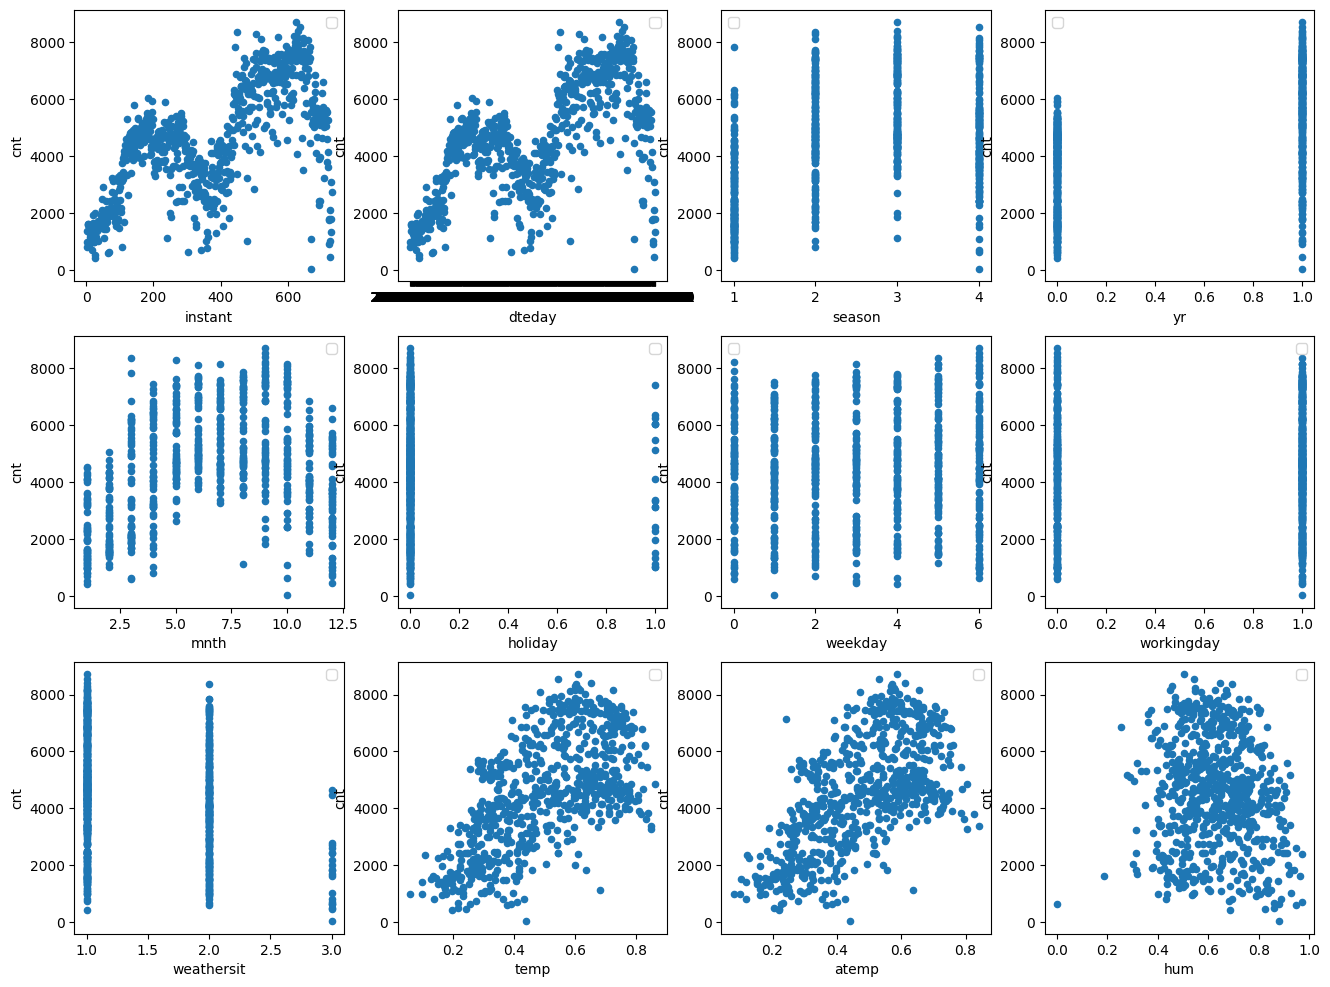

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: ярко выраженная зависимость в зависимости от месяца (а если быть точнее - времени года). Зимой меньше всего поездок. Резкий всплеск в марте (начало весны) с последующим увеличением вплоть до сентября (где достигает своего пика). Далее начинается снижение вплоть до января.

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: линейная зависимость присутствует в temp и atemp.

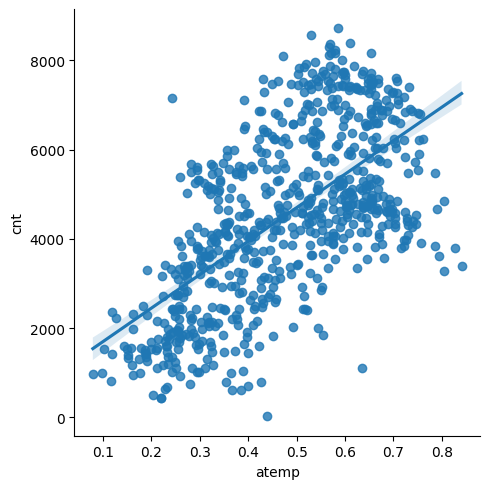

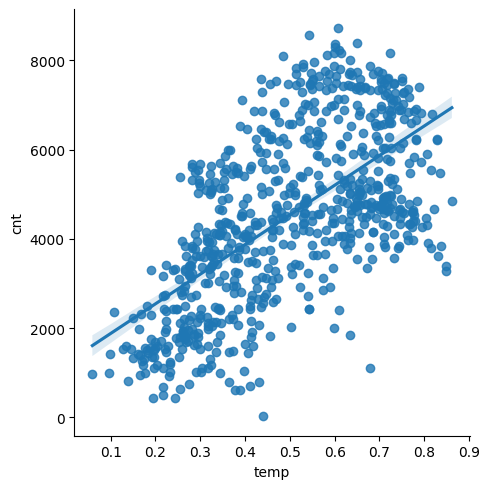

In [ ]:
sns.lmplot(df[['atemp', 'cnt']], x='atemp', y='cnt')
sns.lmplot(df[['temp', 'cnt']], x='temp', y='cnt')

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



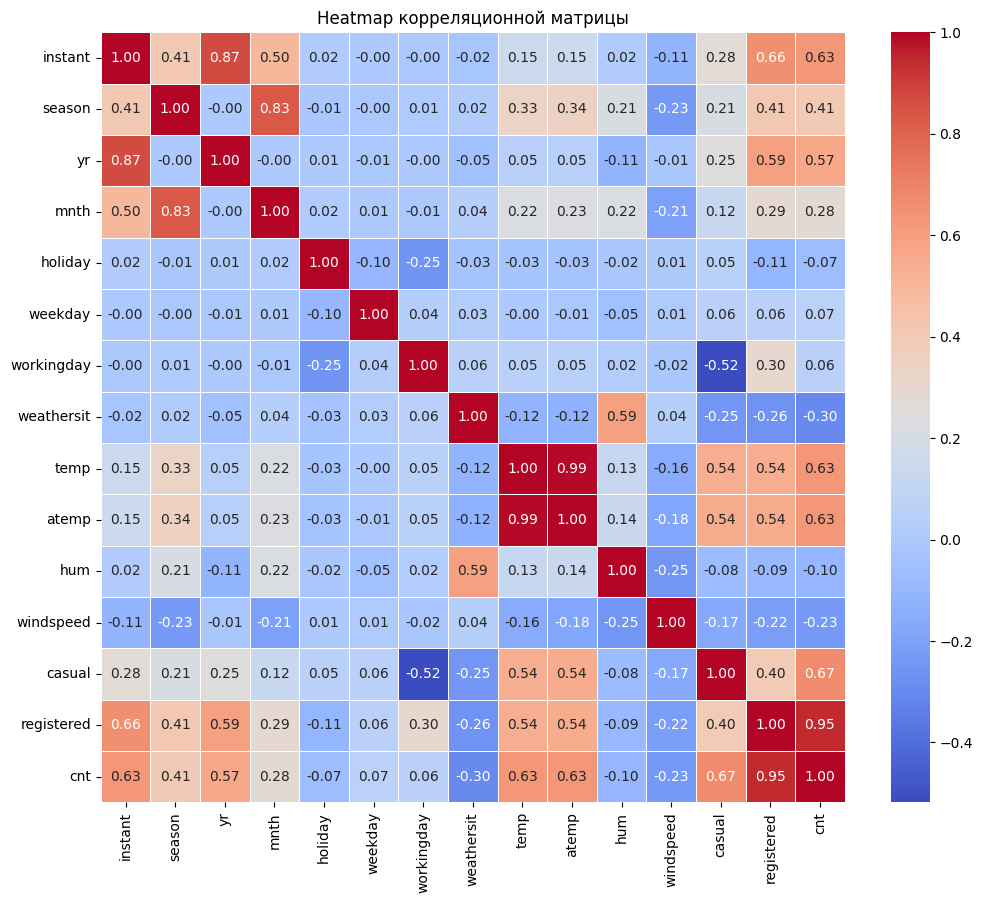

In [ ]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)

plt.figure(figsize=(12, 10))

heatmap = df.select_dtypes('number').corr()
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Heatmap корреляционной матрицы')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



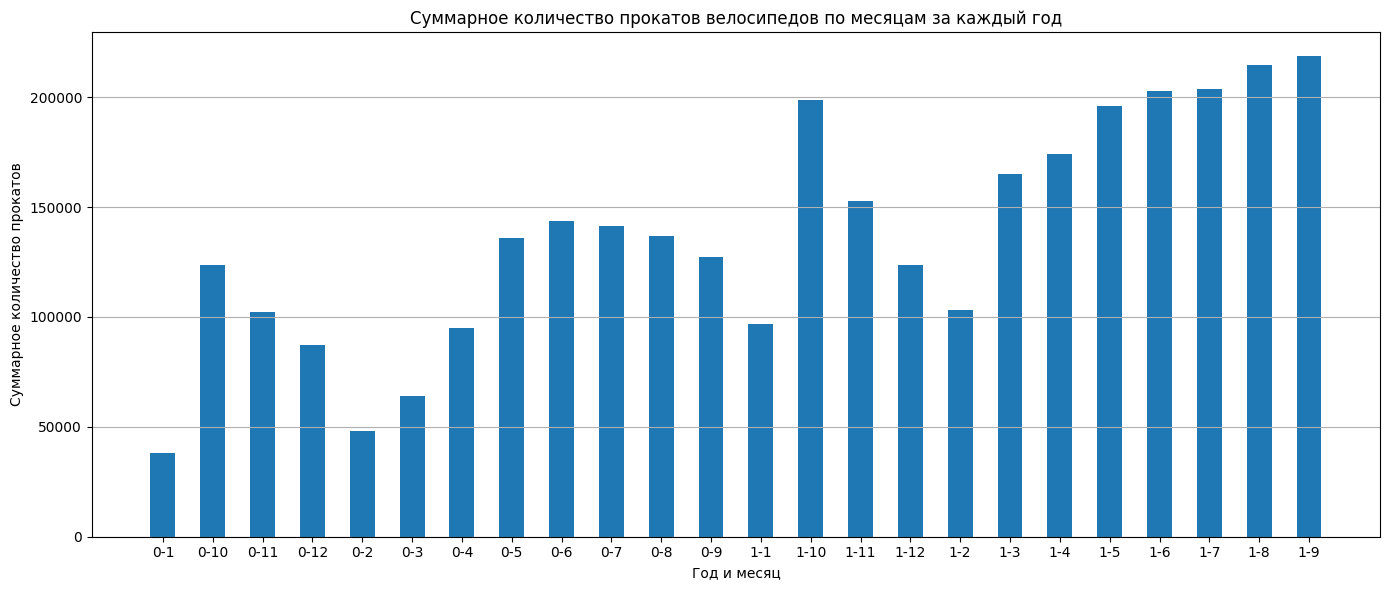

In [ ]:
st = df.copy()
st['year_month'] = st['yr'].astype(str) + '-' + st['mnth'].astype(str)

monthly_counts = st.groupby('year_month')['cnt'].sum()
years, months = zip(*[x.split('-') for x in monthly_counts.index])

plt.figure(figsize=(14, 6))
plt.bar(monthly_counts.index, monthly_counts.values, width=0.5)
plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xlabel('Год и месяц')
plt.ylabel('Суммарное количество прокатов')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ:

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



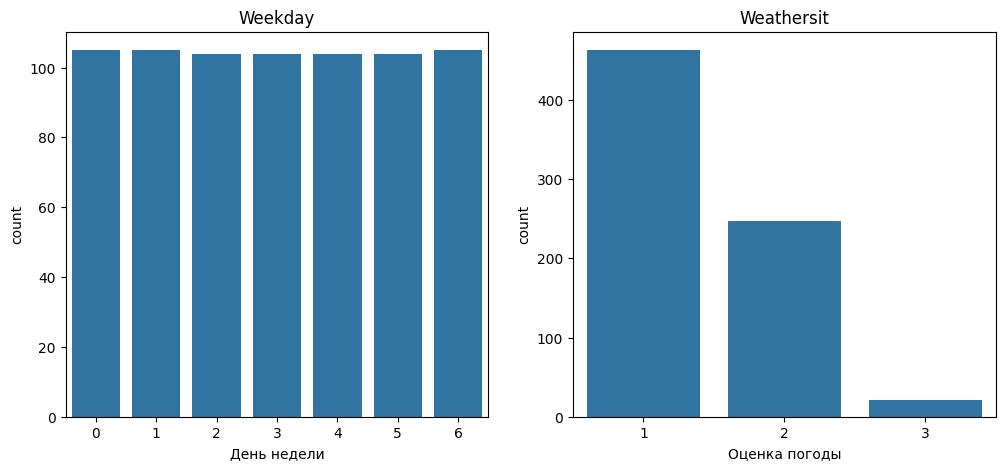

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=st, x='weekday')
plt.title('Weekday')
plt.xlabel('День недели')


plt.subplot(1, 2, 2)
sns.countplot(data=st, x='weathersit')
plt.title('Weathersit')
plt.xlabel('Оценка погоды')

plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Датасет Bike Sharing Demand формировался на основе реальных данных автоматизированной системы проката велосипедов (Capital Bikeshare, Вашингтон, США) за 2011–2012 годы, дополненных внешними источниками (погода, календарь).

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ: Равномерное распределение

### 5. Распределение

Постройте распределение целевого признака.


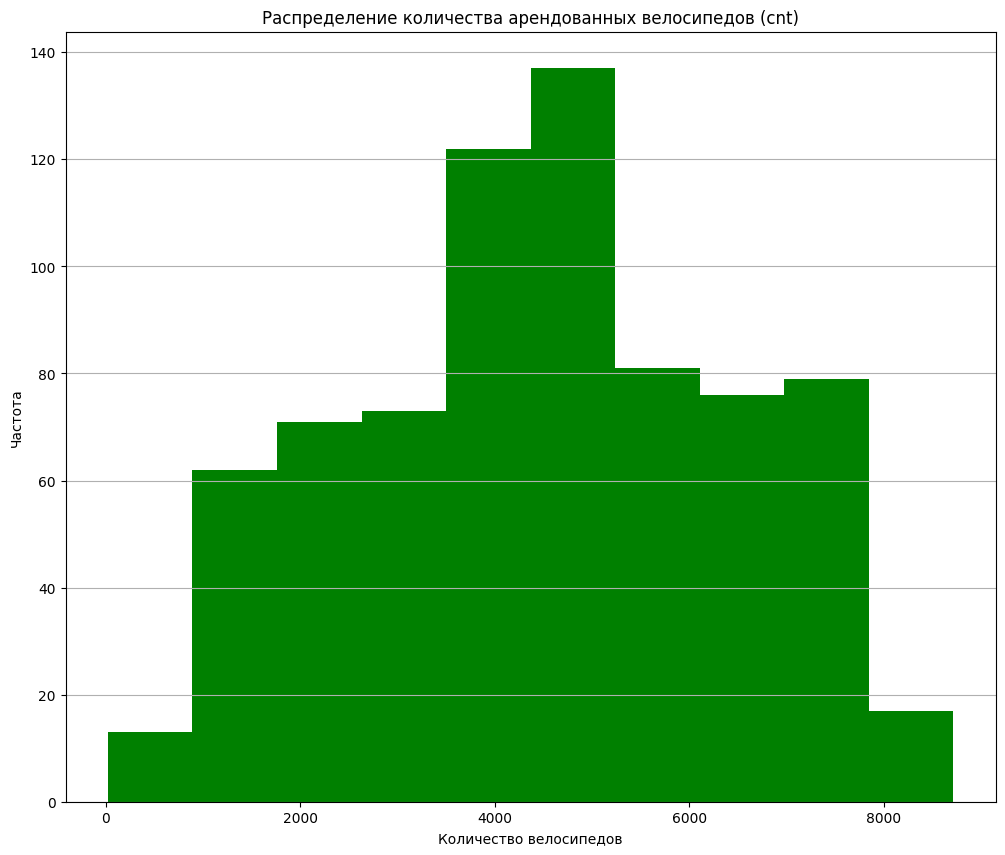

In [ ]:
plt.figure(figsize=(12, 10))
plt.hist(st['cnt'], color='g')
plt.title('Распределение количества арендованных велосипедов (cnt)')
plt.xlabel('Количество велосипедов')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 4000 - 5000

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



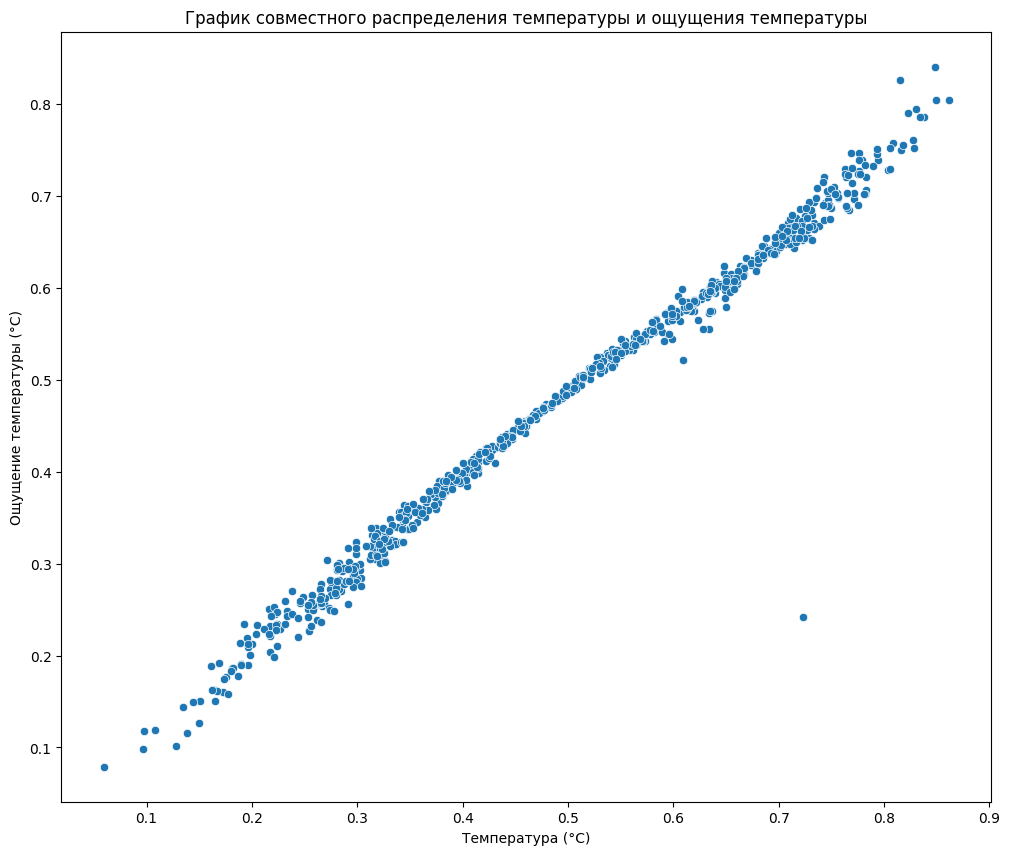

In [ ]:
plt.figure(figsize=(12, 10))
sns.scatterplot(data=st, x='temp', y='atemp')
plt.title('График совместного распределения температуры и ощущения температуры')
plt.xlabel('Температура (°C)')
plt.ylabel('Ощущение температуры (°C)')
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: данные имеют высокую корреляцию. Возможно, показания atemp в данном случае излишни

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




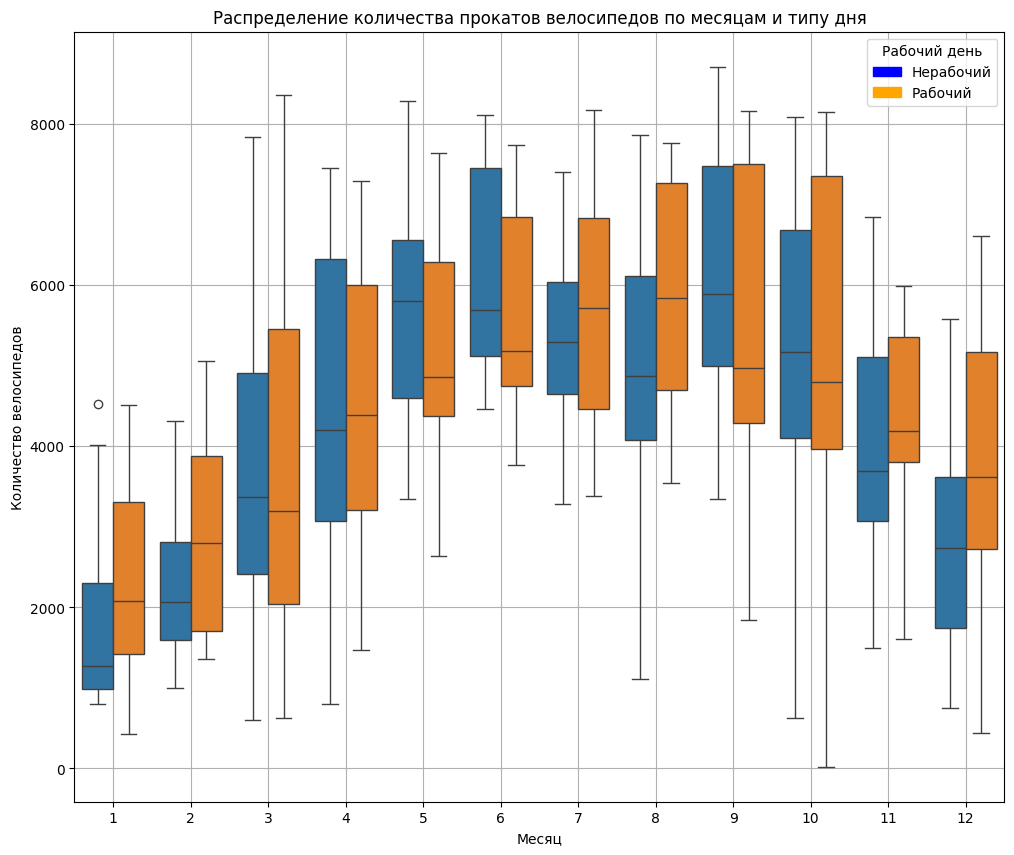

In [ ]:
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='blue', label='Нерабочий')
blue_patch = mpatches.Patch(color='orange', label='Рабочий')

plt.figure(figsize=(12, 10))
sns.boxplot(data=df, x='mnth', y='cnt', hue='workingday')
plt.title('Распределение количества прокатов велосипедов по месяцам и типу дня')
plt.xlabel('Месяц')
plt.ylabel('Количество велосипедов')
plt.legend(title='Рабочий день', handles=[red_patch, blue_patch])
plt.grid(True)
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: Потому что вне сезона (особенно зима) меньше спрос на прокат, однако остаётся достаточно народу, которые используют прокатный транспорт как средство передвижения до рабочего места. В сезонное время спрос на прокатный транспорт сильно возрастает и его чаще используют как средство для проведения досуга

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [3]:
if colab:
    df = pd.read_csv('/content/drive/MyDrive/data_mining/third/StudentsPerformance.csv')
else:
    df = pd.read_csv("../../data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


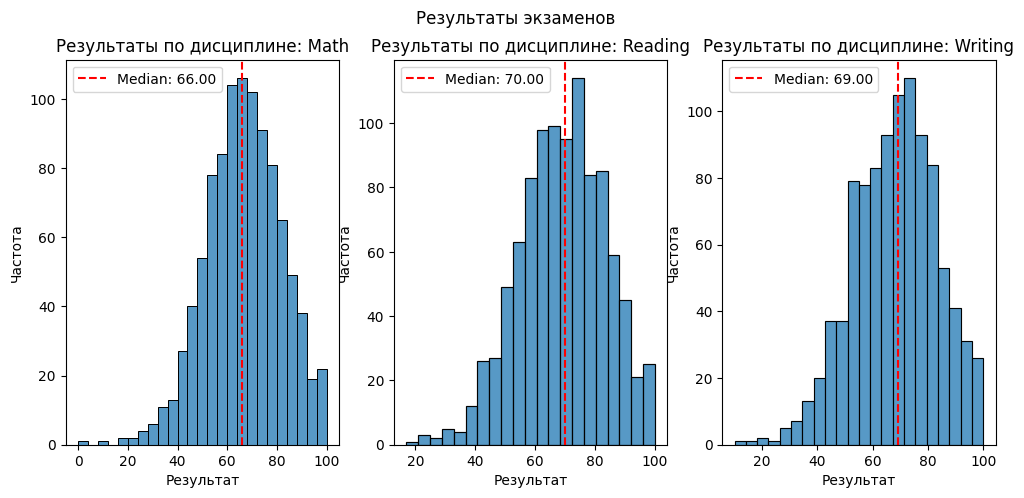

In [4]:
st = df.copy()

f, ax = plt.subplots(1, 3, figsize=(12, 5))

subjects = {
    'math score': 'Math',
    'reading score': 'Reading',
    'writing score': 'Writing'
}

for i, (subj_key, subj_value) in enumerate(subjects.items()):
    sns.histplot(st[subj_key], ax=ax[i])
    median = st[subj_key].median()
    ax[i].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
    ax[i].set_title(f'Результаты по дисциплине: {subj_value}')
    ax[i].set_xlabel('Результат')
    ax[i].set_ylabel('Частота')
    ax[i].legend()

plt.suptitle('Результаты экзаменов')
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


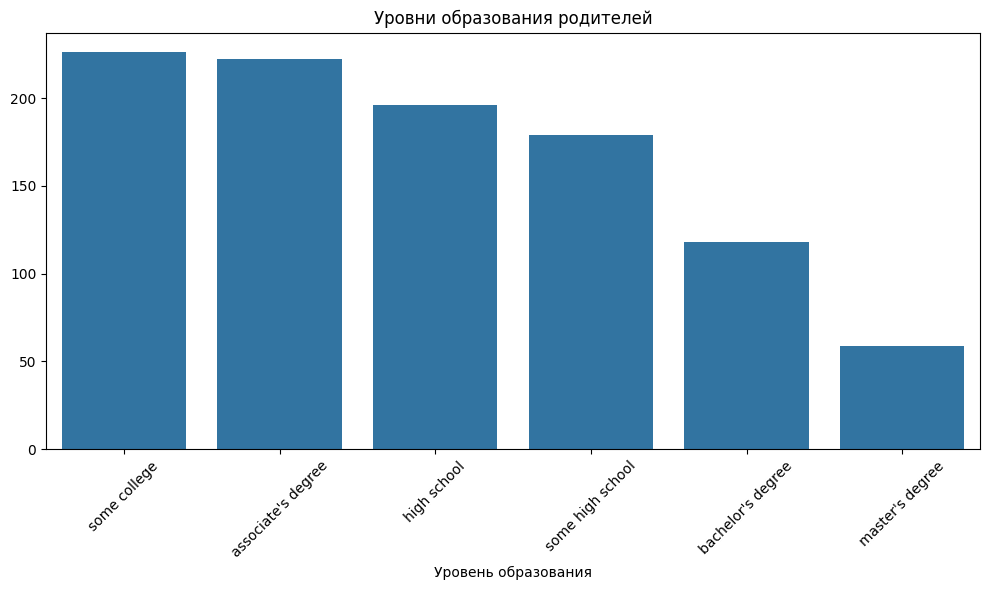

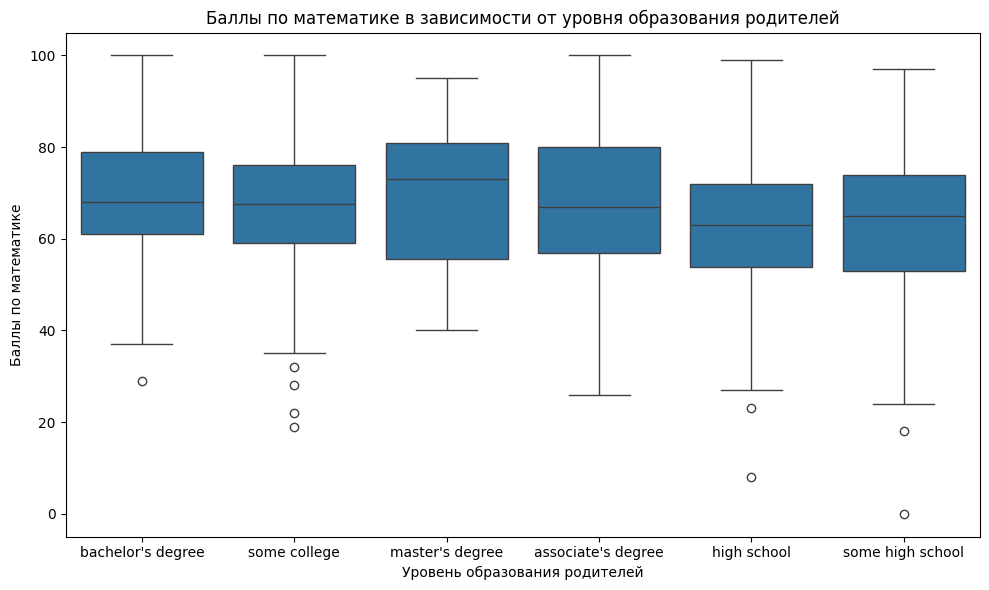

In [5]:
education_counts = st['parental level of education'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=education_counts.index, y=education_counts.values)
plt.title('Уровни образования родителей')
plt.xlabel('Уровень образования')
plt.xticks(rotation=45)
plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.boxplot(data=st, x='parental level of education', y='math score')
plt.title('Баллы по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.tight_layout()
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [6]:
df[
    (df['gender'] == 'female') &
    (df['math score'] > 90) &
    (df['reading score'] > 90) &
    (df['writing score'] > 90)
]['gender'].count()

np.int64(17)

#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [7]:
df.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [8]:
gender_lunch_scores = df.groupby(['gender', 'lunch'])[['math score', 'reading score', 'writing score']].mean()
gender_prep_scores = df.groupby(['gender', 'test preparation course'])[['math score', 'reading score', 'writing score']].mean()

In [9]:
# Средний балл по полу и типу обеда
gender_lunch_scores

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

In [10]:
# Средний балл по полу и подготовке к тесту
gender_prep_scores

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

Ответ: подготовка **влияет** на результаты теста

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

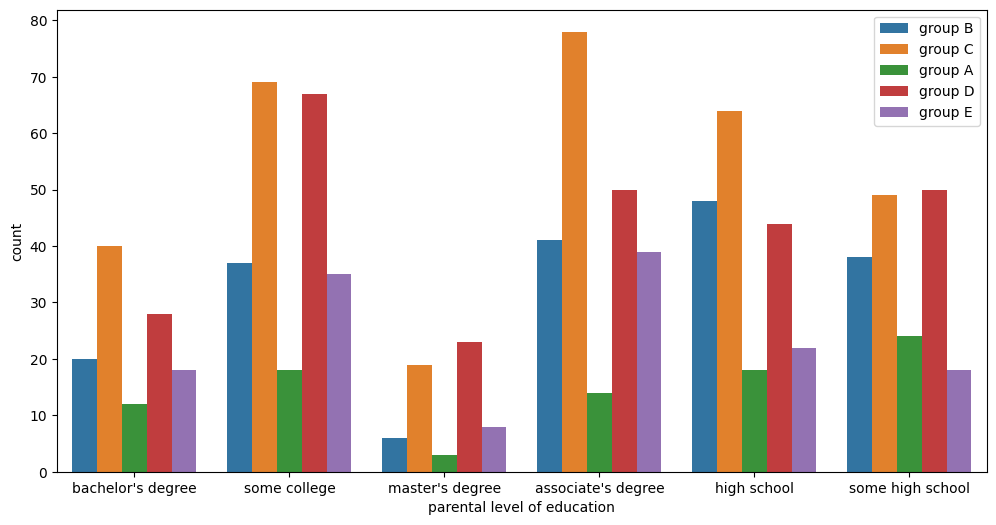

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='race/ethnicity')
plt.legend()
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<Axes: xlabel='parental level of education', ylabel='count'>

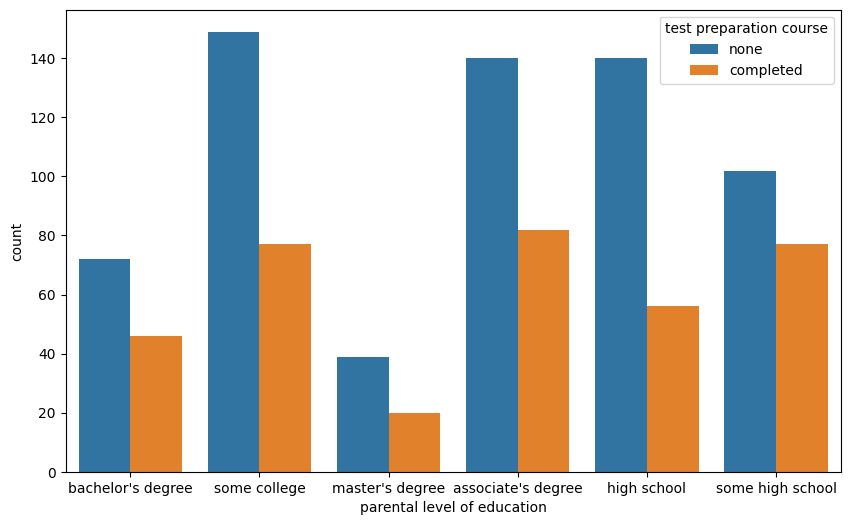

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course')

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

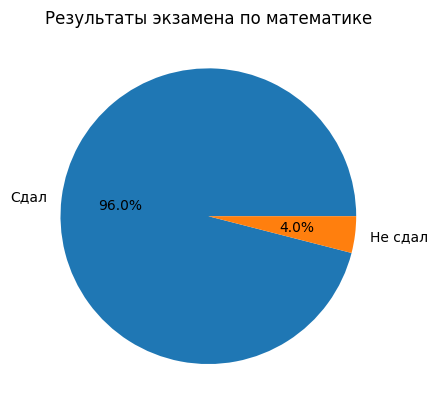

In [13]:
passed = (st['math score'] >= 40).sum()
failed = len(df) - passed

plt.pie([passed, failed], labels=['Сдал', 'Не сдал'], autopct='%1.1f%%')
plt.title('Результаты экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

In [20]:
def generate_grades(column):
    return np.select(
        [
            column.between(0.0, 40.0),
            column.between(40.0, 60.0),
            column.between(60.0, 70.0),
            column.between(70.0, 80.0),
            column.between(80.0, 90.0),
            column.between(90.0, 100.0),
        ],
        [
            'E',
            'D',
            'C',
            'B',
            'A',
            'O'
        ],
        default='Unknown'
    )

In [18]:
import numpy as np

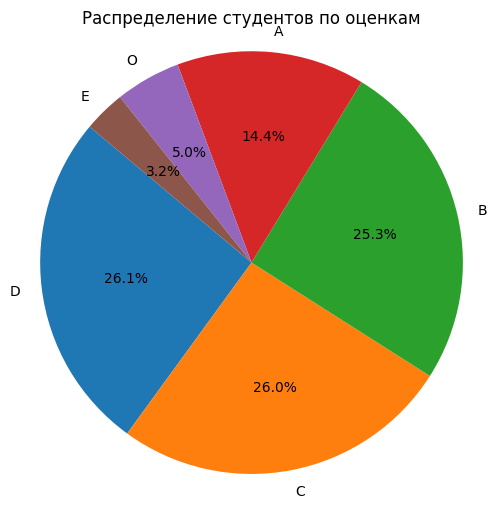

In [21]:
st = df.copy()

st['average score'] = st[['math score', 'reading score', 'writing score']].mean(axis=1)
st['grade'] = generate_grades(st['average score'])

grade_counts = st['grade'].value_counts()

data = grade_counts.values
labels = grade_counts.index

plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение студентов по оценкам')
plt.axis('equal')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

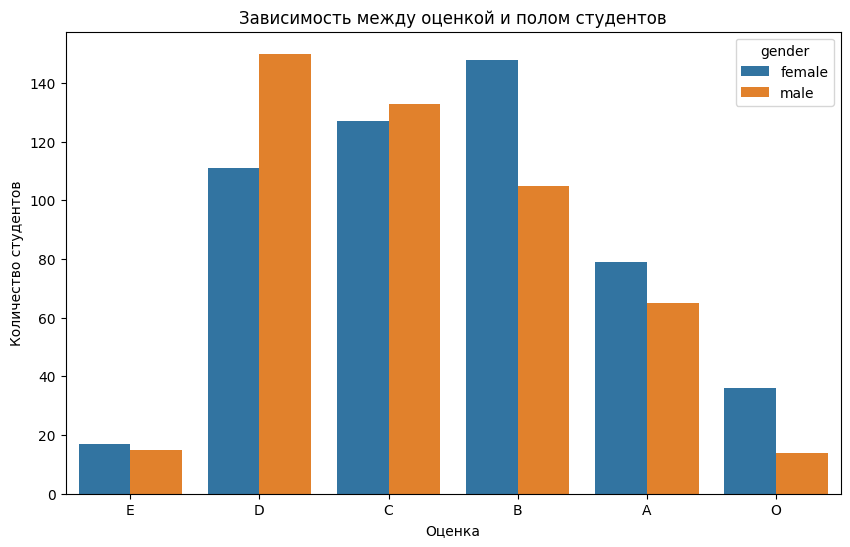

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=st, x='grade', hue='gender', order=['E', 'D', 'C', 'B', 'A', 'O'])
plt.title('Зависимость между оценкой и полом студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.show()

Ответ: women